# Manna model

In [1]:
import SOC.models
model = SOC.models.Manna(100)
model.run(30000)

In [2]:
model.animate_states(notebook=True)

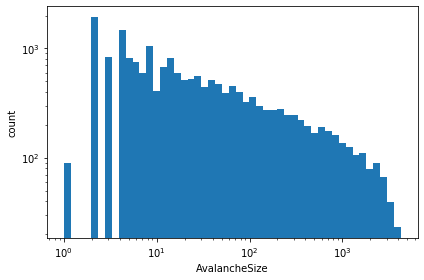

In [2]:
heights, bin_edges = model.plot_histogram(num=50)

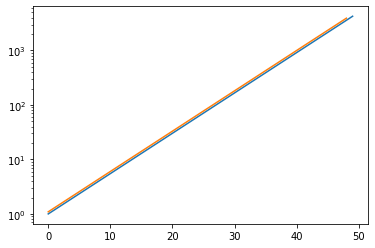

In [3]:
plt.semilogy(bin_edges)
bin_middles = (bin_edges[1:] + bin_edges[:-1])/2
plt.semilogy(bin_middles)   # to trzeba poprawić - interpolacja?

In [4]:
np.where(heights == 0)[0].max()+1

8

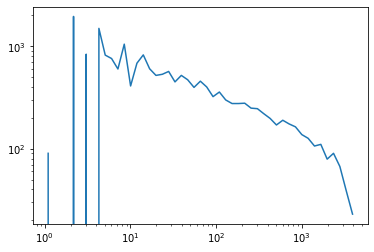

In [5]:
plt.loglog(bin_middles, heights)

In [6]:
heights  # zera

array([  90.,    0.,    0.,    0., 1941.,    0.,  832.,    0., 1485.,
        815.,  755.,  597., 1042.,  408.,  680.,  819.,  600.,  517.,
        530.,  565.,  447.,  517.,  469.,  395.,  454.,  399.,  321.,
        356.,  298.,  275.,  275.,  277.,  248.,  245.,  219.,  197.,
        170.,  189.,  174.,  163.,  137.,  126.,  106.,  110.,   79.,
         90.,   67.,   39.,   23.])

In [7]:
finites = np.isfinite(np.log10(heights))
heights[finites], bin_middles[finites]

/progs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


(array([  90., 1941.,  832., 1485.,  815.,  755.,  597., 1042.,  408.,
         680.,  819.,  600.,  517.,  530.,  565.,  447.,  517.,  469.,
         395.,  454.,  399.,  321.,  356.,  298.,  275.,  275.,  277.,
         248.,  245.,  219.,  197.,  170.,  189.,  174.,  163.,  137.,
         126.,  106.,  110.,   79.,   90.,   67.,   39.,   23.]),
 array([1.09295947e+00, 2.16184270e+00, 3.04042368e+00, 4.27606326e+00,
        5.07106444e+00, 6.01387140e+00, 7.13196404e+00, 8.45793129e+00,
        1.00304210e+01, 1.18952663e+01, 1.41068217e+01, 1.67295471e+01,
        1.98398869e+01, 2.35284978e+01, 2.79028913e+01, 3.30905675e+01,
        3.92427310e+01, 4.65386982e+01, 5.51911240e+01, 6.54521996e+01,
        7.76210037e+01, 9.20522190e+01, 1.09166471e+02, 1.29462586e+02,
        1.53532134e+02, 1.82076666e+02, 2.15928168e+02, 2.56073306e+02,
        3.03682186e+02, 3.60142458e+02, 4.27099765e+02, 5.06505703e+02,
        6.00674711e+02, 7.12351521e+02, 8.44791165e+02, 1.00185385e+03,
  

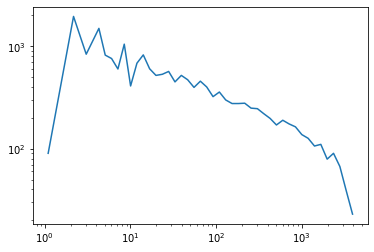

In [8]:
plt.loglog(bin_middles[finites], heights[finites])

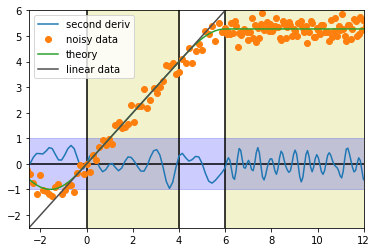

In [11]:
# https://stackoverflow.com/questions/13691775/python-pinpointing-the-linear-part-of-a-slope

# create theoretical data
x_a = np.linspace(-8,0, 60)
y_a = np.sin(x_a)
x_b = np.linspace(0,4,30)[1:]
y_b = x_b[:]
x_c = np.linspace(4,6,15)[1:]
y_c = np.sin((x_c - 4)/4*np.pi)/np.pi*4. + 4
x_d = np.linspace(6,14,120)[1:]
y_d = np.zeros(len(x_d)) + 4 + (4/np.pi)

x = np.concatenate((x_a, x_b, x_c, x_d))
y = np.concatenate((y_a, y_b, y_c, y_d))


# make noisy data from theoretical data
y_n = y + np.random.normal(0, 0.27, len(x))

# create convolution kernel for calculating
# the smoothed second order derivative
smooth_width = 20
x1 = np.linspace(-3,3,smooth_width)
norm = np.sum(np.exp(-x1**2)) * (x1[1]-x1[0]) # ad hoc normalization
y1 = (4*x1**2 - 2) * np.exp(-x1**2) / smooth_width *8#norm*(x1[1]-x1[0])



# calculate second order deriv.
y_conv = np.convolve(y_n, y1, mode="same")

# plot data
plt.plot(x,y_conv, label = "second deriv")
plt.plot(x, y_n,"o", label = "noisy data")
plt.plot(x, y, label="theory")
plt.plot(x, x, "0.3", label = "linear data")
plt.hlines([0],-10, 20)
plt.axvspan(0,4, color="y", alpha=0.2)
plt.axvspan(6,14, color="y", alpha=0.2)
plt.axhspan(-1,1, color="b", alpha=0.2)
plt.vlines([0, 4, 6],-10, 10)
plt.xlim(-2.5,12)
plt.ylim(-2.5,6)
plt.legend(loc=0)
plt.show()

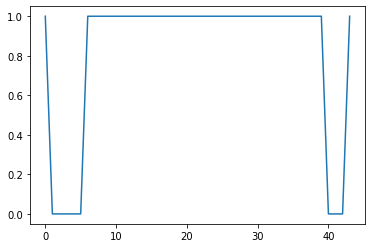

In [46]:
second_deriv = np.convolve(np.log10(heights[finites]), y1, mode='same')

small_second_deriv = (np.abs(second_deriv) <= 1)
plt.plot(small_second_deriv)

In [47]:
import numba

@numba.njit
def find_largest_true_block(arr):
    start_index = -1
    max_start_index = -1
    max_length = -1
    length = -1
    i = 0
    is_in_block = False
    while i < len(arr):
        if arr[i] and not is_in_block:
            start_index = i
            length = 0
            is_in_block = True
        elif arr[i] and is_in_block:
            length += 1
        else:
            is_in_block = False
            if length > max_length:
                max_length = length
                max_start_index = start_index
        i += 1
    if length > max_length:
        max_length = length
        max_start_index = start_index
    return max_start_index, max_start_index + max_length

ind_min, ind_max = find_largest_true_block(small_second_deriv)
ind_min, ind_max

        
    

(6, 39)

In [48]:
small_second_deriv

array([ True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True])

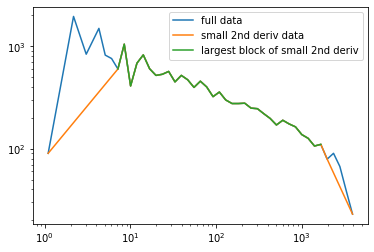

In [50]:
plt.loglog(bin_middles[finites], heights[finites], label="full data")
plt.loglog(bin_middles[finites][small_second_deriv], heights[finites][small_second_deriv], label="small 2nd deriv data")
plt.loglog(bin_middles[finites][ind_min:ind_max], heights[finites][ind_min:ind_max], label="largest block of small 2nd deriv")
plt.legend()

In [57]:
def grab_second_deriv(arr,smooth_width: int = 20):
    smooth_width = 20
    x1 = np.linspace(-3,3,smooth_width)
    norm = np.sum(np.exp(-x1**2)) * (x1[1]-x1[0]) # ad hoc normalization
    y1 = (4*x1**2 - 2) * np.exp(-x1**2) / smooth_width *8#norm*(x1[1]-x1[0])
    y_conv = np.convolve(arr, y1, mode="same")
    return y_conv

def get_flat_indices(arr, smooth_width: int = 20, d2_cutoff: float = 1):
    second_deriv = grab_second_deriv(arr, smooth_width)
    ind_min, ind_max = find_largest_true_block(np.abs(second_deriv) <= d2_cutoff)
    return ind_min, ind_max

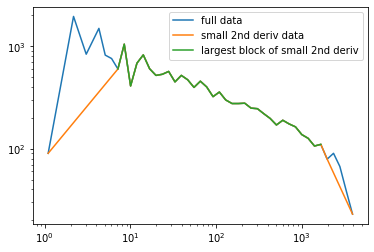

In [59]:
ind_min, ind_max = get_flat_indices(np.log10(heights[finites]))
plt.loglog(bin_middles[finites], heights[finites], label="full data")
plt.loglog(bin_middles[finites][small_second_deriv], heights[finites][small_second_deriv], label="small 2nd deriv data")
plt.loglog(bin_middles[finites][ind_min:ind_max], heights[finites][ind_min:ind_max], label="largest block of small 2nd deriv")
plt.legend()

In [67]:
fit = np.polynomial.Polynomial.fit(bin_middles[finites][ind_min:ind_max],
                                   heights[finites][ind_min:ind_max],
                                   1
                                  )
fit

Polynomial([ 199.51508737, -279.81743161], domain=[   7.13196404, 1670.97285453], window=[-1.,  1.])

In [70]:
wykladnik = fit.coef[1]
wykladnik # wtf

-279.8174316050846